In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_slow_cable = pd.read_csv("../dfs/2023-09-14_16-50-46.csv")
df_fast_cable = pd.read_csv("../dfs/2023-09-14_18-49-51.csv")

## inspect visually looking for anomalies

<Axes: >

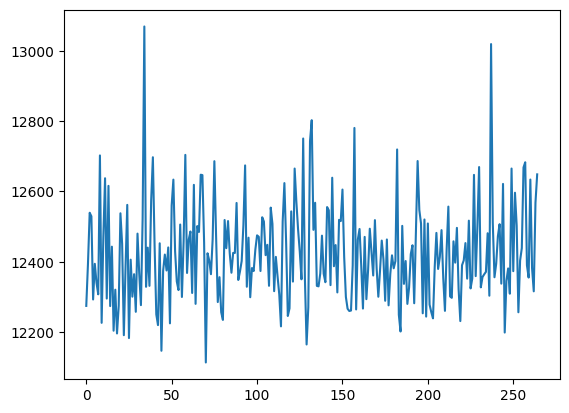

In [3]:
df_slow_cable['timings.total'].plot()

<Axes: >

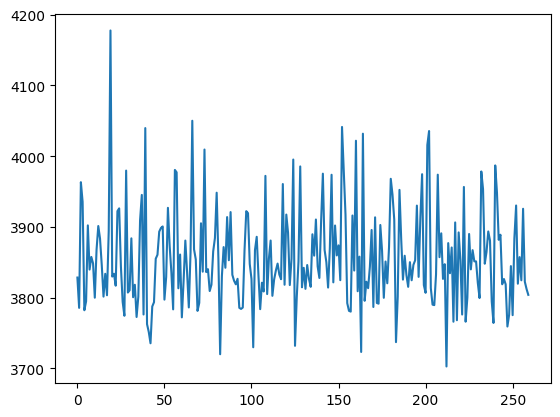

In [4]:
df_fast_cable['timings.total'].plot()

## plot included in report

In [5]:
# change units to seconds
df_slow_cable['timings.total'] /= 1000
df_fast_cable['timings.total'] /= 1000

Text(0.5, 0.98, 'SFE time comparison using different cables \n N = 250')

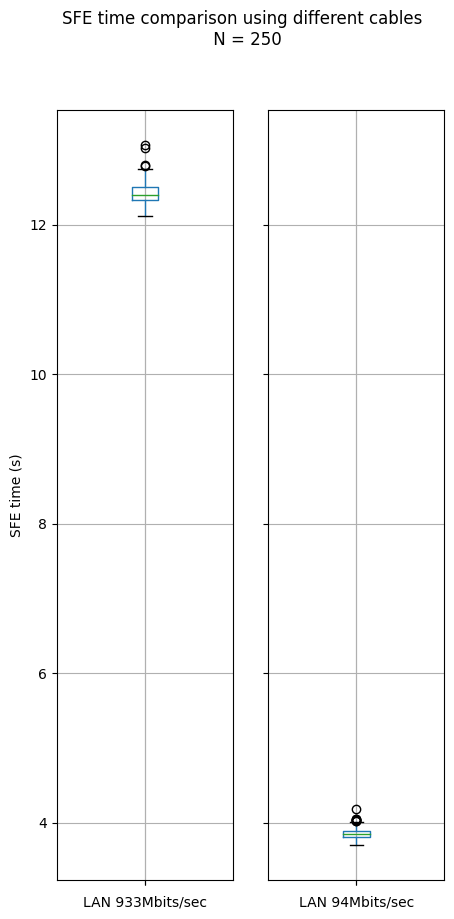

In [13]:
plt.rcParams['figure.figsize'] = [5, 10]  # default hor./vert. size of plots, in inches
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
df_slow_cable.boxplot(column='timings.total', ax=axs[0])
df_fast_cable.boxplot(column='timings.total', ax=axs[1])

axs[1].set_xlabel('LAN 94Mbits/sec')
axs[0].set_ylabel('SFE time (s)')

axs[0].set_xlabel('LAN 933Mbits/sec')


axs[0].set_xticklabels([])
axs[1].set_xticklabels([]) 
fig.suptitle('SFE time comparison using different cables \n N = 250')

Text(0.5, 0.98, 'SFE time comparison using different cables \n N = 250')

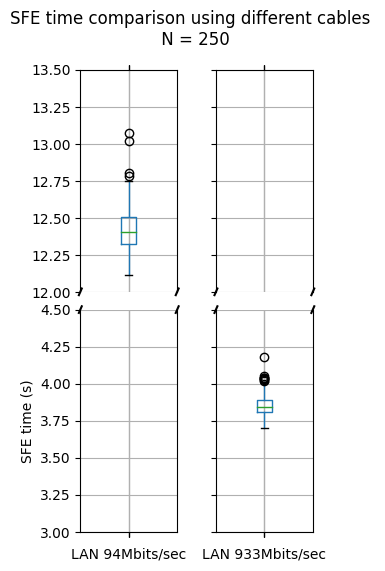

In [15]:
import itertools
plt.rcParams['figure.figsize'] = [3, 6]  # default hor./vert. size of plots, in inches
fig, axs = plt.subplots(2, 2, sharex=True)
df_slow_cable.boxplot(column='timings.total', ax=axs[0,0])
df_fast_cable.boxplot(column='timings.total', ax=axs[0,1])
axs[0,0].set_ylim(12,13.5)
axs[0,1].set_ylim(12,13.5)
df_fast_cable.boxplot(column='timings.total', ax=axs[1,1])
df_slow_cable.boxplot(column='timings.total', ax=axs[1,0])
axs[1,1].set_ylim(3,4.5)
axs[1,0].set_ylim(3,4.5)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
axs[0,0].spines['bottom'].set_visible(False)
axs[0,1].spines['bottom'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[0,0].xaxis.tick_top()
axs[0,1].xaxis.tick_top()
axs[1,0].xaxis.tick_bottom()
axs[1,1].xaxis.tick_bottom()
plt.subplots_adjust(hspace=0.08, wspace=0.4)

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
for x in itertools.product([0], [0,1]):
    kwargs = dict(transform=axs[x].transAxes, color='k', clip_on=False)
    axs[x].plot((-d, +d), (-d, +d), **kwargs)
    axs[x].plot((1 - d, 1 + d), (-d, +d), **kwargs)

for x in itertools.product([1], [0,1]):
    kwargs = dict(transform=axs[x].transAxes, color='k', clip_on=False)
    axs[x].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    axs[x].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    
axs[1,0].set_xlabel('LAN 94Mbits/sec')
axs[1,0].set_ylabel('SFE time (s)')

axs[1,1].set_xlabel('LAN 933Mbits/sec')


axs[0,1].set_xticklabels([])
axs[1,1].set_xticklabels([]) 
fig.suptitle('SFE time comparison using different cables \n N = 250')